In [1]:
## Test if network works as intended

In [1]:
import numpy as np
from neural_network import Layer
from neural_network import LoadData
from neural_network import ActivationFunction
from neural_network import NeuralNetwork
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
#Creation of the network
dimensions = np.array([4, 8, 5, 3])
functions = np.array([ActivationFunction.sigmoid(), ActivationFunction.sigmoid(), ActivationFunction.sigmoid()])
ff_nn = NeuralNetwork.NeuralNetwork(functions, dimensions, 0.01)

In [3]:
#Load training and testing data
DataLoader = LoadData.LoadData()
X_train, X_test, y_train, y_test = DataLoader.partition_dataset()

In [4]:
def evaluate_error_datasets(X_dataset, y_dataset, network):
    error_list = np.zeros((X_dataset.shape[2], ))
    for i in range(X_dataset.shape[2]):
        X_in = X_dataset[:,:,i]
        y    = y_dataset[:,:,i]
        y_out = ff_nn.propagation(X_in)
        diff = y - y_out
        error = np.dot(diff.T, diff)
        error_list[i] = error[0,0]
    return error_list

In [5]:
epochs = 10000
batch_size = 5
training_error = np.zeros(shape=(epochs, X_train.shape[2])) # Container of the training error
testing_error = np.zeros(shape=(epochs, X_test.shape[2])) #Container for the testing error
for k in range(epochs):
    # Select withing the training set the samples that will be given for the batch
    indexes = np.random.randint(0, high=99, size=(batch_size,))
    X_train_ = X_train[:,:,indexes].copy()
    y_train_ = y_train[:,:,indexes].copy()
    
    #Bear in mind this is not the most efficient way to implement a nn. 
    #It was used merely to illustrate the mathematical concepts
    #At this point the weights and biases of the network were updated for this specific
    #sample
    for i in range(X_train_.shape[2]):
        X_in = X_train_[:,:,i]
        y_in = y_train_[:,:,i]
        ff_nn.backpropagation_algorithm(X_in, y_in)
        
    # It is interesting to see how the error evolves with the time
    # At this point we run the network as is for the test set
    training_error[k, :] = evaluate_error_datasets(X_train, y_train, ff_nn)
    testing_error[k, :]  = evaluate_error_datasets(X_test, y_test, ff_nn)

In [6]:
training_error_stat = np.mean(training_error, axis=1)
testing_error_stat  = np.mean(testing_error, axis=1)

Text(0, 0.5, 'mean squared error')

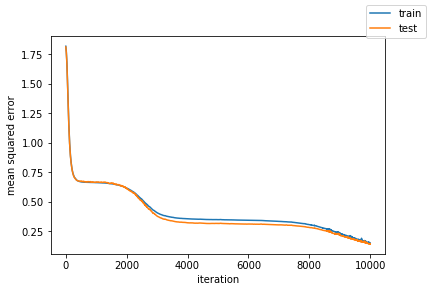

In [17]:
x_tr = np.array(range(training_error_stat.shape[0]))
x_ts = np.array(range(testing_error_stat.shape[0]))
fig1 = plt.gcf()
lines = plt.plot(x_tr, training_error_stat, x_ts, testing_error_stat)
fig1.legend(('train', 'test'),loc='upper right')
plt.xlabel('iteration')
plt.ylabel('mean squared error')

In [18]:

fig1.savefig('error_evolution.png')